## **Classifying songs to genre using keywords**

##### Importing all necessary packages

In [522]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import string
import random
import time
import sys

# for displaying charts in notebook
%matplotlib inline 


##### Importing .csv file

In [523]:
data = pd.read_csv(r"TASK2_dataset.csv")
data.drop_duplicates(inplace=True)
data

,song_id,keyword_1,keyword_2,keyword_3,genre
0,74,guitar,happy,distorted,rock
1,103,brass,energetic,melodic,classical
2,201,banjo,happy,acoustic,country
3,194,synth,energetic,heavy,hip-hop
4,184,synth,energetic,slow,hip-hop
...,...,...,...,...,...
142,195,synth,angry,melodic,hip-hop
143,7,guitar,energetic,fast,pop
144,14,guitar,happy,rhythmic,pop
145,36,synth,mellow,danceable,pop


#### Converting dataset to list and embedding them for vectorization

In [524]:
xp=list(data['keyword_1'])
yp=list(data['keyword_2'])
zp=list(data['keyword_3'])
kp=list(data['genre'])

In [525]:

k4=[0 for i in range(len(kp))]
kl=[99 for i in range(len(kp))]
for i in range(len(kp)):
        if(kp[i]=='rock'):
            k4[0]+=1
            kp[i]=0
            kl[i]=0
        elif(kp[i]=='classical'):
            k4[1]+=1
            kp[i]=1
            kl[i]=1
        elif(kp[i]=='country'):
            k4[2]+=1
            kp[i]=2
            kl[i]=2
        elif(kp[i]=='hip-hop'):
            k4[3]+=1
            kp[i]=3
            kl[i]=3
        elif(kp[i]=='pop'):
            k4[4]+=1
            kp[i]=4
            kl[i]=4

ct1=[[0,0,0,0,0,0]for j in range(6)]
ct2=[[0,0,0,0,0,0]for j in range(9)]
ct3=[[0,0,0,0,0,0]for j in range(10)]
ct4=[0,0,0,0,0]

def wordEmbed(p,q,r):
    
    p_map = {'guitar': 0, 'brass': 1, 'banjo': 2, 'synth': 3, 'violin': 4, 'piano': 5}
    q_map = {'happy': 0, 'energetic': 1, 'calm': 2, 'mellow': 3, 'emotional': 4, 'nostalgic': 5, 'angry': 6, 'sad': 7, 'upbeat': 8}
    r_map = {'distorted': 0, 'melodic': 1, 'acoustic': 2, 'heavy': 3, 'slow': 4, 'upbeat': 5, 'rhythmic': 6, 'twangy': 7, 'fast': 8, 'danceable': 9}

    # Iterate through all items in the list
    for i in range(len(p)):
        if p[i] in p_map:
            idx = p_map[p[i]]
            ct1[idx][0] += 1
            ct1[idx][kl[i] + 1] += 1
            p[i] = idx  # Convert to int

        if q[i] in q_map:
            idx = q_map[q[i]]
            ct2[idx][0] += 1
            ct2[idx][kl[i] + 1] += 1
            q[i] = idx  # Convert to int

        if r[i] in r_map:
            idx = r_map[r[i]]
            ct3[idx][0] += 1
            ct3[idx][kl[i] + 1] += 1
            r[i] = idx  # Convert to int

    return ct1, ct2, ct3

k1, k2, k3= wordEmbed(xp,yp,zp)
k_container=[k1,k2,k3,k4]

In [526]:
labels=[[0.0 for j in range(6)],[0.0 for j in range(9)],[0.0 for j in range(10)]]
for counter_embed in range(3):
    if counter_embed==0:
        range_embed=6
    elif counter_embed==1:
        range_embed=9
    elif counter_embed==2:
        range_embed=10
    for i in range(range_embed):
        for j in range(1,6):
            labels[counter_embed][i]+=(k_container[counter_embed][i][j]/k4[j-1])

#### Vectorizing the dataset after embedding it

In [527]:
xl=[99 for i in range(len(xp))]
yl=[99 for i in range(len(xl))]
zl=[99 for i in range(len(xl))]
#kl=[99 for i in range(len(xl))]

In [528]:
for counter_embed in range(3):
    if counter_embed==0:
        range_embed=6
    elif counter_embed==1:
        range_embed=9
    elif counter_embed==2:
        range_embed=10
    for i in range(len(kp)):
        for j in range(range_embed):
            if(xp[i]==j):
                xl[i]=labels[0][j]
            if(yp[i]==j):
                yl[i]=labels[1][j]
            if(zp[i]==j):
                zl[i]=labels[2][j]

##### Storing the embedded data as a .csv file for refrence

In [529]:
df = pd.DataFrame({"xl": xl, "yl": yl, "zl": zl, "kl": kl})
df.to_csv("ConvertedData2.csv", index=False)

##### Taking 5 random data points and initializing all arrays and variables

In [530]:
rr = df.sample(n=5, random_state=69)[["xl", "yl", "zl"]].to_numpy()
x = [rr[i][0] for i in range(5)]
y = [rr[i][1] for i in range(5)]
z = [rr[i][2] for i in range(5)]

In [531]:
d0 = np.zeros(len(xl))  
d1 = np.zeros(len(xl))
d2 = np.zeros(len(xl))
d3 = np.zeros(len(xl))
d4 = np.zeros(len(xl))
dis = [d0,d1,d2,d3,d4]
ld = np.zeros(len(xl))
colors = ["*" for i in range(len(xl))]
count = np.zeros(5)


##### Funtions for calculating and updating the five reference points

In [532]:
def Dmean():
    for j in range(5):
        for i in range(len(xl)):
            if(ld[i]==j):
                x[j]+=xl[i]
                y[j]+=yl[i]
                z[j]+=zl[i]
                count[j]+=1

    for i in range(5):
        if(count[i]==0):
            count[i]+=1
        x[i]/=count[i]
        y[i]/=count[i]
        z[i]/=count[i]
        count[i]=0

In [533]:
def leastDplotter():
    for j in range(5):
        for i in range(len(xl)):
            dis[j][i]=np.cbrt(pow(xl[i]-x[j],2)+pow(yl[i]-y[j],2)+pow(zl[i]-z[j],2))

    color_coding=['yellow','red','blue','green','cyan']
    for counter_dist in range(5):
        for i in range(len(xl)):
            if(np.minimum(np.minimum(np.minimum(np.minimum(d0[i],d1[i]),d2[i]),d3[i]),d4[i])==dis[counter_dist][i]):
                ld[i]=counter_dist
                colors[i]=color_coding[counter_dist]


#### Function for plotting the vectorized points in 3d space

In [534]:
def plotter():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(xl, yl, zl, c=colors, cmap='coolwarm')
    fig.colorbar(scatter)

    fig.set_facecolor('black')  # Sets figure background
    ax.set_facecolor('black')   # Sets subplot background

    # Setting axis label colors to white
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.zaxis.label.set_color('white')

    #Labelling axes
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')

    # Setting tick labels to white for visibility
    ax.tick_params(colors='white')

    plt.show()

#### Function for assinging the clusters to most appropriate genre

In [535]:
def confusion_matrix(yT, yP):
    #Computes a confusion matrix (dictionary format)
    lp = list(zip(yT, yP))      #labeled pairs
    con = {}

    for tl, pl in lp:
        if (tl, pl) in con:
            con[(tl, pl)] += 1
        else:
            con[(tl, pl)] = 1

    return con

def gmapping(confusion_dict):
    #Finds the best label mapping using a greedy approach
    mapping = {}
    
    # Count occurrences for each predicted label
    ttp = {}    #true to predicted
    for (tl, pl), count in confusion_dict.items():
        if tl not in ttp:
            ttp[tl] = []
        ttp[tl].append((pl, count))
    
    # Sort by highest count to get the best match
    for tl in ttp:
        ttp[tl].sort(key=lambda x: x[1], reverse=True)
    
    usedp = set()
    for tl, pcount in sorted(ttp.items(), key=lambda x: -max([c for _, c in x[1]])):
        for pl, _ in pcount:
            if pl not in usedp:
                mapping[pl] = tl
                usedp.add(pl)
                break  # Move to next true label
    
    return mapping


In [536]:
def align_clusters(yT, yP):
    """Aligns predicted clusters with true clusters using confusion matrix."""
    cD = confusion_matrix(yT, yP)
    mapping = gmapping(cD)

    # Reassigning labels based on mapping
    yReal = np.array([mapping[label] if label in mapping else label for label in yP])

    return yReal, mapping

#### Function for checking accuracy

In [537]:
def ptester(ldd):
    percent=0.0
    for i in range(len(xl)):
        if(ldd[i]==kl[i]):
            percent+=1
    percent*=100/len(xl)
    return percent

**Enter keyword1 then press enter followed be keyword2 then enter and at last keyword3, the respective genre will be displayed**

## Training and implementation

Accuracy =  59.183673469387756


C:\Users\kshit\AppData\Local\Temp\ipykernel_15368\1047548297.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(xl, yl, zl, c=colors, cmap='coolwarm')


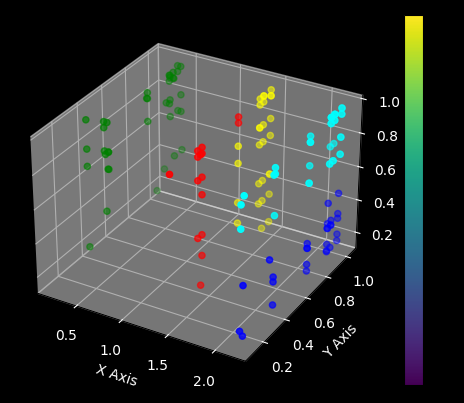

Yellow for  hip-hop
Red for  pop
Blue for  rock
Green for  classical
Cyan for  country


It's a rock


In [538]:
startTime=time.time()
while time.time()-startTime<3:
    leastDplotter()
    Dmean()


y_pred_aligned, mapping = align_clusters(kl, ld)
print("Accuracy = ",ptester(y_pred_aligned))

genre=["rock", "classical", "country", "hip-hop", "pop"]
plotter() #for plotting data points as group
print("Yellow for ",genre[mapping[0]])
print("Red for ",genre[mapping[1]])
print("Blue for ",genre[mapping[2]])
print("Green for ",genre[mapping[3]])
print("Cyan for ",genre[mapping[4]])

#For input of all three keywords, applying BoW and checking which genre it belongs
d=np.zeros(5)
xqq=[0]
yqq=[0]
zqq=[0]

xqq[0]=input()
yqq[0]=input()
zqq[0]=input()

xq,yq,zq=wordEmbed(xqq,yqq,zqq)

xq[0]=labels[0][xqq[0]]
yq[0]=labels[1][yqq[0]]
zq[0]=labels[2][zqq[0]]

if xq[0]==-1 or yq[0]==-1 or zq[0]==-1:
    print("No or wrong input")
    sys.exit(0)
for i in range(5):
    d[i]=np.cbrt(pow(xq[0]-x[i],2)+pow(yq[0]-y[i],2)+pow(zq[0]-z[i],2))
for i in range(5):
    if(np.minimum(np.minimum(np.minimum(np.minimum(d[0],d[1]),d[2]),d[3]),d[4])==d[i]):
        result=mapping[i]

print("\n")
if(result==0):
    print("It's a rock")
elif(result==1):
    print("It's a classical")
elif(result==2):
    print("It's a country")
elif(result==3):
    print("It's a hip-hop")
elif(result==4):
    print("It's a pop")